<a href="https://colab.research.google.com/github/KaueAbbe/Projeto-Estude_Python/blob/main/Estude%20Deep%20Learning/DeepLearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificando Roupas
**Objetivo**: Usar Deep Learning para classificar diferentes tipos de roupas

# Importar dados e Bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import tensorflow
import numpy as np

In [ ]:
from tensorflow import keras
dataset = keras.datasets.fashion_mnist
((imagens_treino,identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()
imagens_treino

4422102/4422102 [==============================] - 1s 0us/step


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
len(imagens_treino)

60000

In [ ]:
imagens_treino.shape

(60000, 28, 28)

In [ ]:
imagens_teste.shape

(10000, 28, 28)

* Para Treino: Temos 60000 Arrays, uma matriz de 28 por 28. 
* Para Teste: Temos 10000 Arrays, uma matriz de 28 por 28. 

In [ ]:
print(identificacoes_treino.shape, identificacoes_teste.shape )

(60000,) (10000,)


# Vendo as imagens
Vamos colocar o rótulo das imagens nesta seção.

Text(0.5, 1.0, '9')

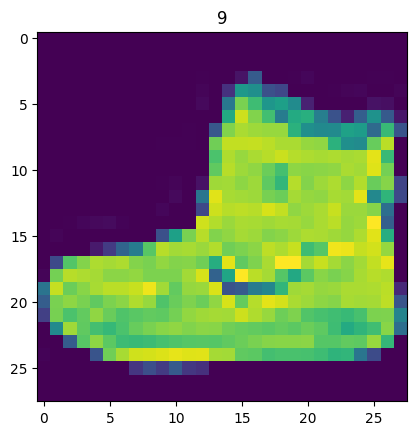

In [ ]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [ ]:
identificacoes_treino

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
print(f'Valor Mínimo: {identificacoes_treino.min()} \n Valor Máximo: {identificacoes_treino.max()}')

Valor Mínimo: 0 
 Valor Máximo: 9


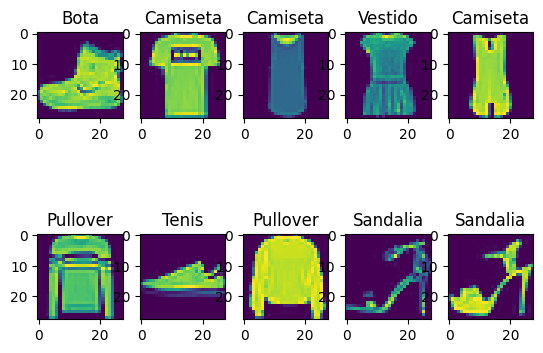

In [ ]:
nome_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido',
                       'Casaco', 'Sandalia', 'Camisa', 'Tenis', 'Bolsa', 'Bota']
for imagem in range(10):
  plt.subplot(2, 5, imagem +1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nome_classificacoes[identificacoes_treino[imagem]])

Nosso modelo tem 3 camadas
* entrada (Camada 0)
* processamento
* Saída
Essas três camadas funcionam em conjunto. 

Abaixo é realizado o achatamendo dos tensores (imagens de 28x28) em um vetor unidimensional. O que faz isso é o comando Flatten. 

No Deep Learning é necessário compilar antes de fittar. Optimizer e loss muda de acordo com o problema que realizará.

In [ ]:
imagens_treino.shape

(60000, 28, 28)

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu), 
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam', 
               loss = 'sparse_categorical_crossentropy')
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 22s 10ms/step - loss: 3.4083


# Melhorando o Modelo
## Camada 1
* Agora queremos **diminuir** as perdas.
Note abaixo que a color varia de 0 a 250. Vamos alterar os dados de treino para pontos fluentes entre 0 e 1 para refazer o modelo

Este processo se chama **normalização**. 

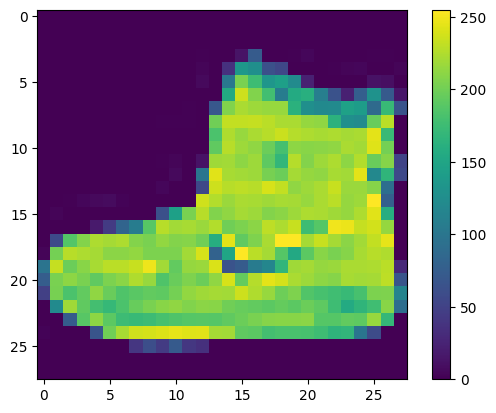

In [ ]:
nome_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido',
                       'Casaco', 'Sandalia', 'Camisa', 'Tenis', 'Bolsa', 'Bota']
"""for imagem in range(10):
  plt.subplot(2, 5, imagem +1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nome_classificacoes[identificacoes_treino[imagem]])"""

plt.imshow(imagens_treino[0])
plt.colorbar()

In [ ]:
imagens_treino = imagens_treino/255.0
#identificacoes_treino = identificacoes_treino/255.0
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu), 
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam', 
               loss = 'sparse_categorical_crossentropy')
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 14s 7ms/step - loss: 0.4845


O modelo diminuir a perda em 10vezes ( 4,79 -> 0.48 )
## Camada 2

Vamos criar mais uma camada para alterar as interações entre camadas, fazendo um funil "contínuo"

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
     keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam', 
               loss = 'sparse_categorical_crossentropy')
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 13s 6ms/step - loss: 0.4729


In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(64, activation = tensorflow.nn.relu), 
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam', 
               loss = 'sparse_categorical_crossentropy')
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.4838


* Infelizmente adicionar camadas não está retornando melhorias significativas, e aumenta o tempo de processamento. Melhor não adicionar camadas novas

* Podemos aumentar a quantidade de treinos atribuindo parâmetro epochs maior que 1. E para adicionar uma métrica adicionamos metrics no compile.

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
     keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam', 
               loss = 'sparse_categorical_crossentropy')
modelo.fit(imagens_treino, identificacoes_treino, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4727
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3569
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3218
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2998
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2824


In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
     keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam', 
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
modelo.fit(imagens_treino, identificacoes_treino, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4727 - accuracy: 0.8293
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3573 - accuracy: 0.8677
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3222 - accuracy: 0.8806
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2995 - accuracy: 0.8889
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2805 - accuracy: 0.8952


# Testando o modelo

In [ ]:
testes = modelo.predict(imagens_teste)

313/313 [==============================] - 1s 4ms/step


In [ ]:
testes[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.99999994],
      dtype=float32)

In [ ]:
print('Resultados testes:', np.argmax(testes[0]))
print('Numero da imagem teste:', identificacoes_teste[0])

Resultados testes: 9
Numero da imagem teste: 9


In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f'Perda do Teste: {perda_teste} \n Acurácia: {acuracia_teste}')

313/313 [==============================] - 1s 3ms/step - loss: 48.3038 - accuracy: 0.8632
Perda do Teste: 48.30384826660156 
 Acurácia: 0.8632000088691711


In [ ]:
print(f'Perda do Teste: {perda_teste} \n Acurácia: {acuracia_teste}')

Perda do Teste: 48.30384826660156 
 Acurácia: 0.8632000088691711


# Validação

É preciso explicar no fit que quer validação. 

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
     keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam', 
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 13s 8ms/step - loss: 2.7938 - accuracy: 0.7450 - val_loss: 0.6347 - val_accuracy: 0.7859
Epoch 2/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5556 - accuracy: 0.8107 - val_loss: 0.5861 - val_accuracy: 0.7947
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4908 - accuracy: 0.8295 - val_loss: 0.4871 - val_accuracy: 0.8278
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4609 - accuracy: 0.8397 - val_loss: 0.4738 - val_accuracy: 0.8354
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4304 - accuracy: 0.8488 - val_loss: 0.4807 - val_accuracy: 0.8342


In [ ]:
historico.history

{'loss': [2.7938127517700195,
  0.5556128621101379,
  0.4907524287700653,
  0.4609290063381195,
  0.4303843080997467],
 'accuracy': [0.7450208067893982,
  0.8106666803359985,
  0.8295208215713501,
  0.8397291898727417,
  0.8488125205039978],
 'val_loss': [0.6347388625144958,
  0.5861074328422546,
  0.4871111214160919,
  0.4737645983695984,
  0.4806618392467499],
 'val_accuracy': [0.7859166860580444,
  0.7946666479110718,
  0.827833354473114,
  0.8354166746139526,
  0.8342499732971191]}

In [ ]:
historico.history['accuracy']

[0.7450208067893982,
 0.8106666803359985,
 0.8295208215713501,
 0.8397291898727417,
 0.8488125205039978]

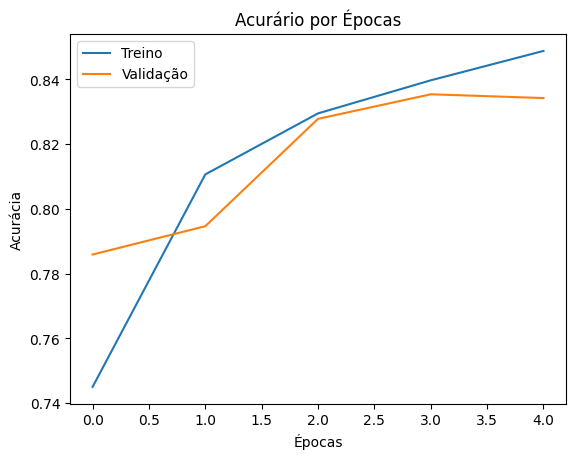

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurário por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

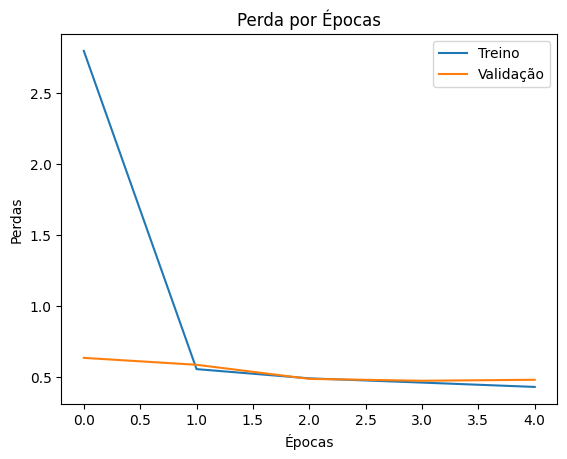

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])

* Tomar sempre cuidado com a quantidade de treinamento: Treinar pouco causa Underfitting, enquanto treinar demais causa overfitting. 

* Uma tática de melhorar o problemas de under e over fitting é utilizar dropout para "adormecer" alguns neurônios. 

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
     keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam', 
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 6ms/step - loss: 2.1347 - accuracy: 0.5938 - val_loss: 0.8662 - val_accuracy: 0.6832
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.8792 - accuracy: 0.6651 - val_loss: 0.7295 - val_accuracy: 0.7335
Epoch 3/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.8045 - accuracy: 0.6923 - val_loss: 0.6486 - val_accuracy: 0.7666
Epoch 4/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.7422 - accuracy: 0.7170 - val_loss: 0.7281 - val_accuracy: 0.6893
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6973 - accuracy: 0.7343 - val_loss: 0.5360 - val_accuracy: 0.8228


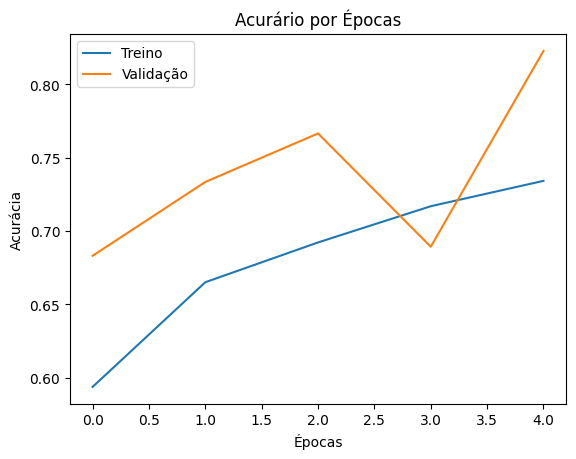

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurário por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

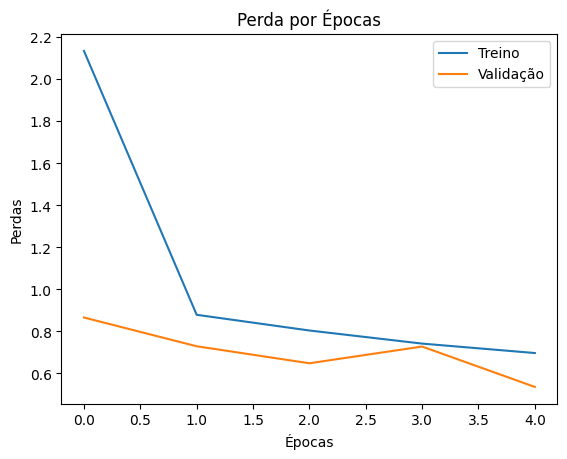

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])

# Salvar modelo

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
     keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam', 
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)
modelo.save('Modelo.h5')

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 2.8077 - accuracy: 0.7498 - val_loss: 0.7861 - val_accuracy: 0.7725
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5989 - accuracy: 0.8033 - val_loss: 0.6541 - val_accuracy: 0.7800
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5202 - accuracy: 0.8207 - val_loss: 0.5267 - val_accuracy: 0.8276
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4826 - accuracy: 0.8289 - val_loss: 0.4600 - val_accuracy: 0.8368
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4317 - accuracy: 0.8436 - val_loss: 0.4655 - val_accuracy: 0.8291


In [ ]:
from tensorflow.keras.models  import load_model
modelo_salvo = load_model('Modelo.h5')

In [ ]:
tst_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado do Modelo salvo:', np.argmax(tst_salvo[1]))
print('Resultado Correto :', identificacoes_teste[1])

313/313 [==============================] - 1s 2ms/step
Resultado do Modelo salvo: 2
Resultado Correto : 2
